In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def grid(n, prob):
    """
    Construct a grid with dimension n with probability prob
    """
    return np.random.choice([0, 1], size=(n, n), p=[prob, 1-prob])

In [12]:
def monte_carlo(samples, n, prob):
    """
    samples: number of samples (int)
    n: size of matrix  (odd int)
    prob: probability of getting 1 or 0 (0<=prob<=1)
    """
    count = 0.
    for _ in range(samples):
        b = grid(n, prob)
        b[(n-1)//2][(n-1)//2] = 2
        stop = False
        while not stop:
            change = False
            for i, j in zip(*np.where(b == 2)):
                if i == 0 or j == 0 or i == n - 1 or j == n - 1:
                    count += 1
                    stop = True
                    break
                if b[i+1, j] == 0:
                    b[i+1, j] = 2
                    change = True
                if b[i, j+1] == 0:
                    b[i, j+1] = 2
                    change = True
                if b[i-1, j] == 0:
                    b[i-1, j] = 2
                    change = True
                if b[i, j-1] == 0:
                    b[i, j-1] = 2
                    change = True
            if not change:
                stop = True
        #plt.imshow(b)
        #plt.show()
    return count / samples

In [22]:
def simulation(samples,n_matrix,n_prob):
    """
    Run simulation for various probabilities
    samples: Number of samples (int)
    n_matrix: Size of matrix (odd int)
    n_prob: How many points between 0 and 1
    """
    prob = np.linspace(0.,1.,n_prob)
    f = np.zeros(len(prob))
    for i,val in enumerate(prob):
        f[i] = monte_carlo(samples,n_matrix,val)
    plt.plot(prob,f, 'o')
    plt.title('Percolation')
    plt.xlabel('Probability')
    plt.ylabel('fraction of percolated')
    plt.show()

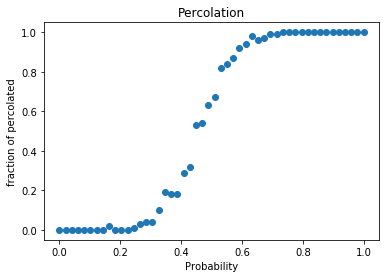

In [23]:
simulation(100,11,50)